In [1]:
import pandas as pd
import math
#from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
#from operator import itemgetter
#from ucimlrepo import fetch_ucirepo 
import numpy as np
import math
#from sklearn.preprocessing import normalize
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from scipy.stats import entropy
from sklearn.model_selection import cross_val_score
import importlib

In [23]:
name_df = "TUANDROMD"
df = pd.read_csv("./datasets/"+name_df+".csv")
df = df.astype(str)
df.dtypes

ACCESS_ALL_DOWNLOADS                                        object
ACCESS_CACHE_FILESYSTEM                                     object
ACCESS_CHECKIN_PROPERTIES                                   object
ACCESS_COARSE_LOCATION                                      object
ACCESS_COARSE_UPDATES                                       object
                                                             ...  
Landroid/telephony/TelephonyManager;->getSimOperatorName    object
Landroid/telephony/TelephonyManager;->getSimCountryIso      object
Landroid/telephony/TelephonyManager;->getSimSerialNumber    object
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    object
Class                                                       object
Length: 242, dtype: object

In [24]:
# FALTA POR COMPROBAR TIPOS DE VALORES EN EL DF
def transform_df(df):
    df_t = df.copy()
    df_t.dropna(inplace=True)
    columns = list(df_t.columns)
    for c in columns:
        unique_values = df_t[c].unique()
        df_t[c].replace(unique_values,range(1,len(unique_values)+1),inplace=True)
    return df_t

In [25]:
df_processed = transform_df(df)
## line to produce npy file to execute FS method in SOTA
#np.save("./datasets/TUANDROMD.npy", np.array(df_processed))
instances = df_processed.shape[0]
target = df_processed["Class"] # Get target column
features = df_processed.drop("Class", axis=1) # Get features dataset without target column
dict_features = {column: i for i, column in enumerate(features.columns)}
dict_features

{'ACCESS_ALL_DOWNLOADS': 0,
 'ACCESS_CACHE_FILESYSTEM': 1,
 'ACCESS_CHECKIN_PROPERTIES': 2,
 'ACCESS_COARSE_LOCATION': 3,
 'ACCESS_COARSE_UPDATES': 4,
 'ACCESS_FINE_LOCATION': 5,
 'ACCESS_LOCATION_EXTRA_COMMANDS': 6,
 'ACCESS_MOCK_LOCATION': 7,
 'ACCESS_MTK_MMHW': 8,
 'ACCESS_NETWORK_STATE': 9,
 'ACCESS_PROVIDER': 10,
 'ACCESS_SERVICE': 11,
 'ACCESS_SHARED_DATA': 12,
 'ACCESS_SUPERUSER': 13,
 'ACCESS_SURFACE_FLINGER': 14,
 'ACCESS_WIFI_STATE': 15,
 'activityCalled': 16,
 'ACTIVITY_RECOGNITION': 17,
 'ACCOUNT_MANAGER': 18,
 'ADD_VOICEMAIL': 19,
 'ANT': 20,
 'ANT_ADMIN': 21,
 'AUTHENTICATE_ACCOUNTS': 22,
 'AUTORUN_MANAGER_LICENSE_MANAGER': 23,
 'AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)': 24,
 'BATTERY_STATS': 25,
 'BILLING': 26,
 'BIND_ACCESSIBILITY_SERVICE': 27,
 'BIND_APPWIDGET': 28,
 'BIND_CARRIER_MESSAGING_SERVICE': 29,
 'BIND_DEVICE_ADMIN': 30,
 'BIND_DREAM_SERVICE': 31,
 'BIND_GET_INSTALL_REFERRER_SERVICE': 32,
 'BIND_INPUT_METHOD': 33,
 'BIND_NFC_SERVICE': 34,
 'BIND_goodwareTIFI

In [26]:
# Function that calculate entropy
def calculate_entropy(probs):
    entropy = -sum([prob*math.log(prob) for prob in probs]) 
    return entropy

def calculate_SU(X,Y):
    # Calculate entropy for each variable. We need to get the value counts for each variable and calculate probabilities in order to compute entropy.
    entropy_feature = entropy([value/instances for value in X.value_counts()])
    # Calculate entropy for target variable
    entropy_target = entropy([value/instances for value in Y.value_counts()])
    
    # Calculate mutual information between features and target variable
    mutual_info_features_target = mutual_info_score(X, Y)
    # Compute de SU between features and target. Saved in a list of tuples with form (feature, SU value)
    SU = 2*mutual_info_features_target / (entropy_feature + entropy_target)
    return SU

# def threshold(l):
#     n = len(l)
#     if n == 1:
#         return l[0]
#     c1 = np.sum(np.square(l))
#     c2 = n*np.mean(l)
#     a = n*c1
#     b = c2**2
#     c = n*(n-1)
#     s = math.sqrt((a-b)/c)
#     return s

def threshold(l):
    n = len(l)
    m = np.mean(l)
    cont = 0
    for elem in l:
        cont += (elem**2 - m)**2
    #return np.mean(l)
    return math.sqrt(cont/(n))

def thre(l):
    n = len(l)
    m = np.mean(l)
    cont = 0
    for elem in l[:-1]:
        cont += (elem - 0.78)**2
    return math.sqrt(cont / (n-1))
        
        

        


### 1º paso: Eliminar aquellas variables cuyo SU(Xi,Y) sea menor que el threshold de los valores

In [27]:
dict_SU_features_target = {feature: calculate_SU(df_processed[feature], target) for feature in features}
dict_SU_features_target

{'ACCESS_ALL_DOWNLOADS': 0.0056428918866260735,
 'ACCESS_CACHE_FILESYSTEM': 0.0056428918866260735,
 'ACCESS_CHECKIN_PROPERTIES': 0.004166912579679776,
 'ACCESS_COARSE_LOCATION': 0.07220769543932766,
 'ACCESS_COARSE_UPDATES': 0.005766524207836926,
 'ACCESS_FINE_LOCATION': 0.07648155711856222,
 'ACCESS_LOCATION_EXTRA_COMMANDS': 0.0036580874010065383,
 'ACCESS_MOCK_LOCATION': 0.0017115001028705325,
 'ACCESS_MTK_MMHW': 0.0014237360531021682,
 'ACCESS_NETWORK_STATE': 0.014822808740194081,
 'ACCESS_PROVIDER': 0.0,
 'ACCESS_SERVICE': 0.0,
 'ACCESS_SHARED_DATA': 0.0,
 'ACCESS_SUPERUSER': 0.0015371038092067085,
 'ACCESS_SURFACE_FLINGER': 0.004166912579679776,
 'ACCESS_WIFI_STATE': 0.0053507997429984985,
 'activityCalled': 0.0,
 'ACTIVITY_RECOGNITION': 0.0,
 'ACCOUNT_MANAGER': 0.0001632978935652339,
 'ADD_VOICEMAIL': 0.01570817082968863,
 'ANT': 0.0,
 'ANT_ADMIN': 0.0,
 'AUTHENTICATE_ACCOUNTS': 0.008601598612427895,
 'AUTORUN_MANAGER_LICENSE_MANAGER': 0.0,
 'AUTORUN_MANAGER_LICENSE_SERVICE(.auto

In [28]:
max_SU = max(dict_SU_features_target.values())
number_features = features.shape[1]
value = round(number_features / math.log(number_features))
SU_th = list(dict_SU_features_target.values())[value]
t = threshold(list(dict_SU_features_target.values()))
print(t)
threshold_filter = min(0.1*max_SU,SU_th)
dict_SU_features_target_filter = {k:v for k,v in dict_SU_features_target.items() if v >= threshold_filter}
dict_SU_features_target_filter = dict(sorted(dict_SU_features_target_filter.items(), key=lambda item: item[1], reverse=True))
dict_SU_features_target_filter

0.029401446631924948


{'RECEIVE_BOOT_COMPLETED': 0.5144163582996392,
 'Ljava/net/URL;->openConnection': 0.43611366052085393,
 'Landroid/location/LocationManager;->getLastKgoodwarewnLocation': 0.39253704428123926,
 'GET_TASKS': 0.28026579111157046,
 'Ldalvik/system/DexClassLoader;->loadClass': 0.2238780671416468,
 'Ljava/lang/System;->load': 0.21704471342754467,
 'Ljava/lang/System;->loadLibrary': 0.20654273685113117,
 'WAKE_LOCK': 0.20424685131631246,
 'KILL_BACKGROUND_PROCESSES': 0.18513140378741463,
 'Landroid/telephony/TelephonyManager;->getSimOperatorName': 0.16646725727429204,
 'Landroid/telephony/TelephonyManager;->getSimOperator': 0.13023007331012285,
 'Landroid/content/pm/PackageManager;->getInstalledPackages': 0.11362492895819948,
 'Landroid/telephony/TelephonyManager;->getNetworkCountryIso': 0.1089255207937595,
 'Landroid/telephony/TelephonyManager;->getNetworkOperator': 0.09201779460790817,
 'Landroid/telephony/TelephonyManager;->getCellLocation': 0.08844123137860765,
 'DISABLE_KEYGUARD': 0.07684

In [29]:
def clustering():
    S0 = list(dict_SU_features_target_filter.keys())
    list_clusters = list()
    while len(S0) > 0:
        centroide = S0.pop(0) # SACAMOS EL PRIMER ELEMENTO DE LISTA (EL QUE MAYOR SU TIENE). ESTE ES EL CENTROIDE DE CLUSTER K
        cluster = [centroide]
        F_corr = [calculate_SU(df_processed[centroide], df_processed[feature]) for feature in S0]
        F_corr_condic = [(feature,corr) for feature, corr in zip(S0,F_corr) if corr > dict_SU_features_target_filter[feature]]
        if len(F_corr_condic) != 0:
            thre = threshold(list(map(lambda x: (x[1]), F_corr_condic)))
            #cluster = list(filter(lambda x: x[1] >= thre, F_corr_condic))
            cluster += [elem[0] for elem in F_corr_condic if elem[1] >= thre]
        
        list_clusters.append(cluster)
        S0 = list(set(S0).difference(cluster))
    print(list_clusters)
    return list_clusters

In [30]:
import pygad
import random

In [31]:
importlib.reload(pygad)

list_clusters = clustering()

for cluster in list_clusters:
    for index, elem in enumerate(cluster):
        cluster[index] = dict_features[elem]
print(list_clusters)
number_features_per_cluster = [math.floor(math.sqrt(len(cluster))) for cluster in list_clusters]
num_genes = np.sum(number_features_per_cluster)
sol_per_pop = num_genes * 2

def generate_population():
    list_population = list()
    gene_space = list()
    for number_solution in range(0,sol_per_pop):
        indv = list()
        for n_features, cluster in zip(number_features_per_cluster, list_clusters):
            for i in range(0,n_features):
                if number_solution == 0:
                    gene_space.append([-1] + cluster)
                rand = random.randint(0,len(cluster))
                while rand != 0 and cluster[rand-1] in indv:
                    rand = random.randint(0,len(cluster))
                if rand == 0:
                    indv.append(-1)
                else:    
                    indv.append(cluster[rand-1])
        list_population.append(indv)
    return list_population, gene_space
    

def fitness_func(ga_instance, solution, solution_idx): ## solution is a list containing the subset features
    solution_filter = list(filter(lambda a: a != -1, solution))
    df_solution = features.iloc[:, solution_filter]
    #X_train, X_test, y_train, y_test = train_test_split(df_solution, target, test_size=0.8,random_state=109) # 70% training and 30% test
    clf = svm.SVC()
    #clf = KNeighborsClassifier()
    scores = cross_val_score(clf, df_solution, target, cv=3)
    #clf.fit(X_train,y_train)
    #predicted = clf.predict(X_test)
    #acc = accuracy_score(y_test, predicted)
    return scores.mean()

def crossover_func(parents, offspring_size, ga_instance):
    # if fm > fM: (1-fm/1) / (1-fM/1) else 1
    #cp = ga_instance.crossover_probability
    cp = 1
    pop_fitness = ga_instance.cal_pop_fitness()
    fM = np.mean(pop_fitness)
    parents = parents.tolist()
        
    offspring = []
    while len(offspring) != offspring_size[0]:
        parents_chosen = random.sample(parents, 2)
        fm = np.mean([pop_fitness[parents.index(parents_chosen[0])],pop_fitness[parents.index(parents_chosen[1])]])
        if fm > fM:
            cp = (1-fm/1) / (1-fM/1)
        if random.random() <= cp:
            #mask = list(np.random.randint(low = 0,high=2,size=len(number_features_per_cluster)))
            mask = list(np.random.randint(low = 0,high=2,size=ga_instance.num_genes))
            start = 0
            children1 = []
            children2 = []
            for i, bit in enumerate(mask):
                if bit == 0:
                    children1.extend([parents_chosen[bit][i]]) 
                    children2.extend([parents_chosen[1][i]])
                else:
                    children1.extend([parents_chosen[bit][i]]) 
                    children2.extend([parents_chosen[0][i]])                
                # if bit == 0:
                #     children1.extend(parents_chosen[bit][start:number_features_per_cluster[i]+start]) 
                #     children2.extend(parents_chosen[1][start:number_features_per_cluster[i]+start])
                # else:
                #     children1.extend(parents_chosen[bit][start:number_features_per_cluster[i]+start]) 
                #     children2.extend(parents_chosen[0][start:number_features_per_cluster[i]+start])                
                # start = number_features_per_cluster[i] + start
            offspring.append(children1)
            offspring.append(children2)
    #print(offspring)
    return np.array(offspring)


def on_generation(ga_instance):
    print("Generation = {generation}: Best fitness = {fitness}".format(generation=ga_instance.generations_completed,fitness=max(ga_instance.best_solutions_fitness)))




population, gene_space = generate_population()

ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=10,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population = population,
                       mutation_probability = [0.25,0.1],
                       crossover_probability = 0.7,
                       mutation_type="adaptive",
                       mutation_by_replacement=True,
                       gene_space = gene_space,
                       on_generation=on_generation,
                       parent_selection_type = "tournament",
                       keep_elitism = 0,
                       keep_parents = 0,
                       allow_duplicate_genes = False,
                       crossover_type = crossover_func,
                       stop_criteria = "saturate_10",
                       suppress_warnings=True,
                       parallel_processing=5,
                       save_best_solutions = True
                       )
ga_instance.run()


print(f"Parameters of the best solution : {ga_instance.best_solutions[ga_instance.best_solution_generation]}")
print(f"Fitness value of the best solution = {ga_instance.best_solutions_fitness[ga_instance.best_solution_generation]}")

[['RECEIVE_BOOT_COMPLETED', 'WAKE_LOCK'], ['Landroid/content/pm/PackageManager;->getInstalledPackages', 'Landroid/telephony/TelephonyManager;->getSimOperator', 'Landroid/telephony/TelephonyManager;->getSimOperatorName', 'Landroid/telephony/TelephonyManager;->getCellLocation', 'ACCESS_COARSE_LOCATION'], ['Landroid/telephony/TelephonyManager;->getSimCountryIso', 'Landroid/telephony/TelephonyManager;->getNetworkCountryIso'], ['Ljava/lang/System;->load', 'Ljava/lang/System;->loadLibrary'], ['DOWNLOAD_WITHOUT_goodwareTIFICATION', 'CHANGE_NETWORK_STATE', 'USE_FINGERPRINT'], ['READ_SMS', 'SEND_SMS', 'RECEIVE_SMS'], ['WRITE_EXTERNAL_STORAGE', 'Landroid/telephony/TelephonyManager;->getNetworkOperator', 'KILL_BACKGROUND_PROCESSES', 'Landroid/telephony/TelephonyManager;->getNetworkOperatorName', 'VIBRATE', 'READ_PHONE_STATE'], ['Ljava/net/URL;->openConnection', 'Landroid/location/LocationManager;->getLastKgoodwarewnLocation', 'Ldalvik/system/DexClassLoader;->loadClass'], ['Landroid/content/pm/Pac

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


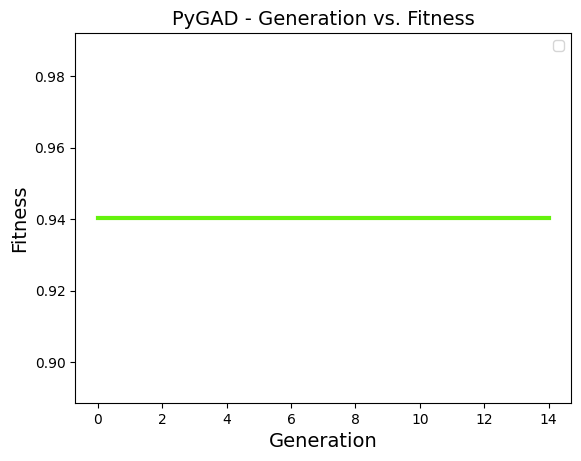

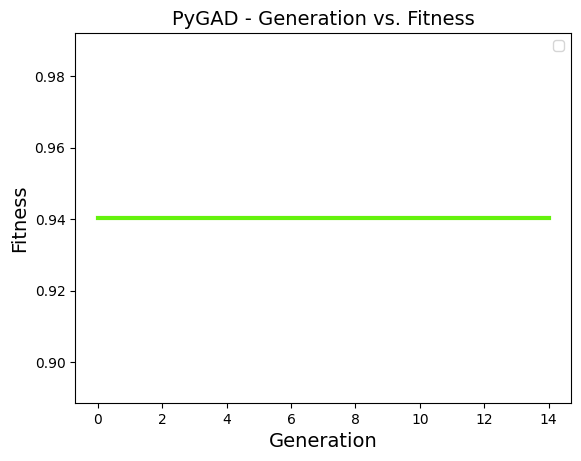

In [200]:
ga_instance.plot_fitness()

In [32]:
solution = ga_instance.best_solutions[ga_instance.best_solution_generation]
s = solution.tolist()
if -1.0 not in s:
    s.append(-1.0)
len(s)

15

### SUBGROUP DISCOVERY

In [2]:
from SD import algorithm as algorithm
import time

In [34]:
index_columns = solution.tolist()
df_filter = df.iloc[:,index_columns]
df_filter.to_csv("./datasets_fs/"+str(name_df)+"_filter.csv",index=False)

In [3]:
name_df = "TUANDROMD"
df = pd.read_csv("./datasets_fs/"+name_df+"_filter.csv")
#df = pd.read_csv("./datasets/"+name_df+".csv")
df = df.astype(str)
df

,RECEIVE_BOOT_COMPLETED,Landroid/content/pm/PackageManager;->getInstalledPackages,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Class,CHANGE_NETWORK_STATE,RECEIVE_SMS,READ_PHONE_STATE,VIBRATE,Ljava/net/URL;->openConnection,Landroid/content/pm/PackageManager;->getInstalledApplications,BLUETOOTH,DISABLE_KEYGUARD,ACCESS_FINE_LOCATION,Landroid/media/AudioRecord;->startRecording
0,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b
1,b,b,b,c,b,b,c,b,c,b,b,b,b,b,b
2,b,b,b,b,b,b,b,b,c,b,b,b,c,b,b
3,b,b,b,c,b,b,c,b,c,b,b,b,b,b,b
4,b,b,b,b,b,b,b,c,c,b,b,b,b,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,b,c,b,b,c,c,b,b,c,c,c,c,b,b,b
4460,c,c,b,b,c,c,b,b,b,c,b,b,b,b,b
4461,c,b,b,b,c,b,b,c,c,b,c,b,b,b,b
4462,c,b,b,b,c,b,b,c,b,c,c,b,b,b,b


In [4]:
#df = pd.read_csv('../datasets/mushrooms.csv')
importlib.reload(algorithm)

# a = {elem:"Col"+str(i) for i, elem in enumerate(df_test.columns[:-1])}
# df_test.rename(columns= a, inplace=True)

betas = np.arange(start=0.1, stop=1, step=.1)
searchspace = algorithm.create_nominal_selectors(df)
a = []
for target in df["Class"].unique():
        target = ["Class", target]
        #print("Class: {}".format(target[1]))
        task = algorithm.SubgroupDiscoveryTask (
                df, 
                target, 
                searchspace,
                name_df, 
                depth=df.shape[1]-1,
                alpha = 1/(df.shape[1]-1),
                beta = 0.3 )
        start = time.perf_counter()
        r = algorithm.SubgoupDiscoverySearch().execute(task)
        end = time.perf_counter()
        a.append([end-start] + r)
df_aux = pd.DataFrame(a,columns = ["time","target","size","length","redundancy","wracc","coverage","confidence","odd"])
#l1.append(df_aux.mean().to_dict())
#df_results = pd.DataFrame(l1,columns = ["target","size","length","redundancy","wracc","coverage","confidence","odd"])
#df_aux.to_csv("./results/"+str(name_df)+"/igsd_non_FS.csv",index=False)
df_aux.to_csv("./results/"+str(name_df)+"/igsd_FS.csv",index=False)
        

Iteration 0 of 14. Number of patterns: 1
Iteration 1 of 14. Number of patterns: 7
Iteration 2 of 14. Number of patterns: 20
Iteration 3 of 14. Number of patterns: 4
8
2
Iteration 0 of 14. Number of patterns: 1
Iteration 1 of 14. Number of patterns: 7
Iteration 2 of 14. Number of patterns: 36
Iteration 3 of 14. Number of patterns: 5
10
2


### SOTA SD ALGORITHMS

In [4]:
import execute_algorithms

In [5]:
importlib.reload(execute_algorithms)
# 1: SSD, 2:FSSD
# df_filter = pd.read_csv("./datasets_fs/TUANDROMD_filter.csv")
# df_filter = df_filter.astype(str)
name_df = "TUANDROMD"
FS = True
#route_csv = "./datasets/"+name_df+".csv"
route_csv = "./datasets_fs/"+name_df+"_filter.csv"
execute_algorithms.execute(2,route_csv,name_df)
execute_algorithms.getStats(2,route_csv,name_df,FS)